# Wiki-Vote Experiments Output Visualization

In [98]:
#!/usr/bin/python
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [99]:
def parse_results(path):
    pr_seed = []
    pr_adopters = []
    eigen_seed = []
    eigen_adopters = []
    bet_seed = []
    bet_adopters = []
    with open(path, 'r') as fp:
        for line in fp:
            if '#' in line:
                continue
            row = line.split()
            pr_seed.append(row[0])
            pr_adopters.append(row[1])
            eigen_seed.append(row[2])
            eigen_adopters.append(row[3])
            bet_seed.append(row[4])
            bet_adopters.append(row[5])

    fp.close()
    return (np.column_stack((map(int, pr_seed), map(int, pr_adopters))),
           np.column_stack((map(int, eigen_seed), map(int, eigen_adopters))),
           np.column_stack((map(int, bet_seed), map(int, bet_adopters))))

In [100]:
def get_percentage(data):
    N = np.shape(data)[0]
    seeds = list(set(data[:,0]))
    seeds.sort()
    return [(i, float(len([x for x in data[:,0] if x == i]))/N) for i in seeds]

In [101]:
def draw_pie(perc):
    labels = tuple(['Top {}'.format(t[0]) for t in perc])
    sizes = [p[1]*100 for p in perc]
    explode = tuple(0.0 for _ in xrange(len(sizes)-1))
    explode += 0.1,
    plt.pie(sizes, explode=explode, labels=labels,
            autopct='%1.1f%%', shadow=True, startangle=90)
    # Set aspect ratio to be equal so that pie is drawn as a circle.
    plt.axis('equal')

In [178]:
def draw_bars(pr, eigen, bet):
    fig, ax = plt.subplots(figsize=(20,15))

    bar_width = 0.32

    opacity = 0.4
    loc = np.arange(100)
    rects1 = plt.bar(loc, pr[:,1], bar_width,
                     alpha=opacity,
                     color='b',
                     label='Page Rank')

    rects2 = plt.bar(loc+bar_width, eigen[:,1], bar_width,
                     alpha=opacity,
                     color='r',
                     label='Eigenvector')

    rects3 = plt.bar(loc+2*bar_width, bet[:,1], bar_width,
                     alpha=opacity,
                     color='y',
                     label='Betweenness')

    plt.xlabel('Centrality Measures')
    plt.ylabel('Adopters')
    plt.title('Adopters Comparison')
    ticks = [i for i,x in enumerate(pr[:,0]) if x < pr[:,0][i-1] or x > pr[:,0][i-1]]
    rects1.set_alpha()
    ticks = [i for i,x in enumerate(eigen[:,0]) if x < eigen[:,0][i-1] or x > eigen[:,0][i-1]]
    plt.xticks(ticks, ['E '+str(eigen[:,0][i]) for i in ticks])
    ticks = [i for i,x in enumerate(bet[:,0]) if x < bet[:,0][i-1] or x > bet[:,0][i-1]]
    plt.xticks(ticks, ['B '+str(bet[:,0][i]) for i in ticks])

#    plt.xticks(loc+bar_width, eigen[:,0])
#    plt.xticks(loc+2*bar_width, bet[:,0])

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.tight_layout()

## Parse results

In [102]:
pr, eigen, bet = parse_results('test_wikivote.txt')

## PageRank Seeds Percentage
#### How many times the "Top X" nodes from PageRank have led to the max infection

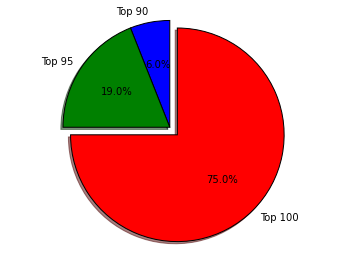

In [103]:
draw_pie(get_percentage(pr))

## Eigenvector Seeds Percentage
#### How many times the "Top X" nodes from Eigenvector have led to the max infection

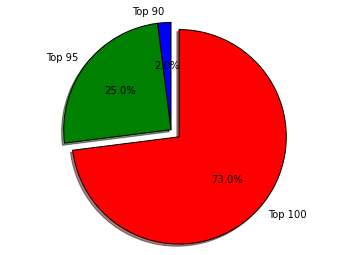

In [104]:
draw_pie(get_percentage(eigen))

## Betweenness Seeds Percentage
#### How many times the "Top X" nodes from Betweenness have led to the max infection

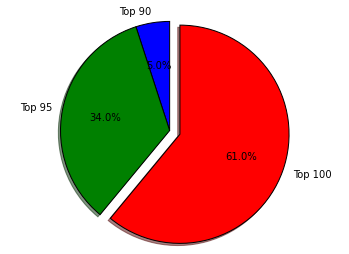

In [105]:
draw_pie(get_percentage(bet))

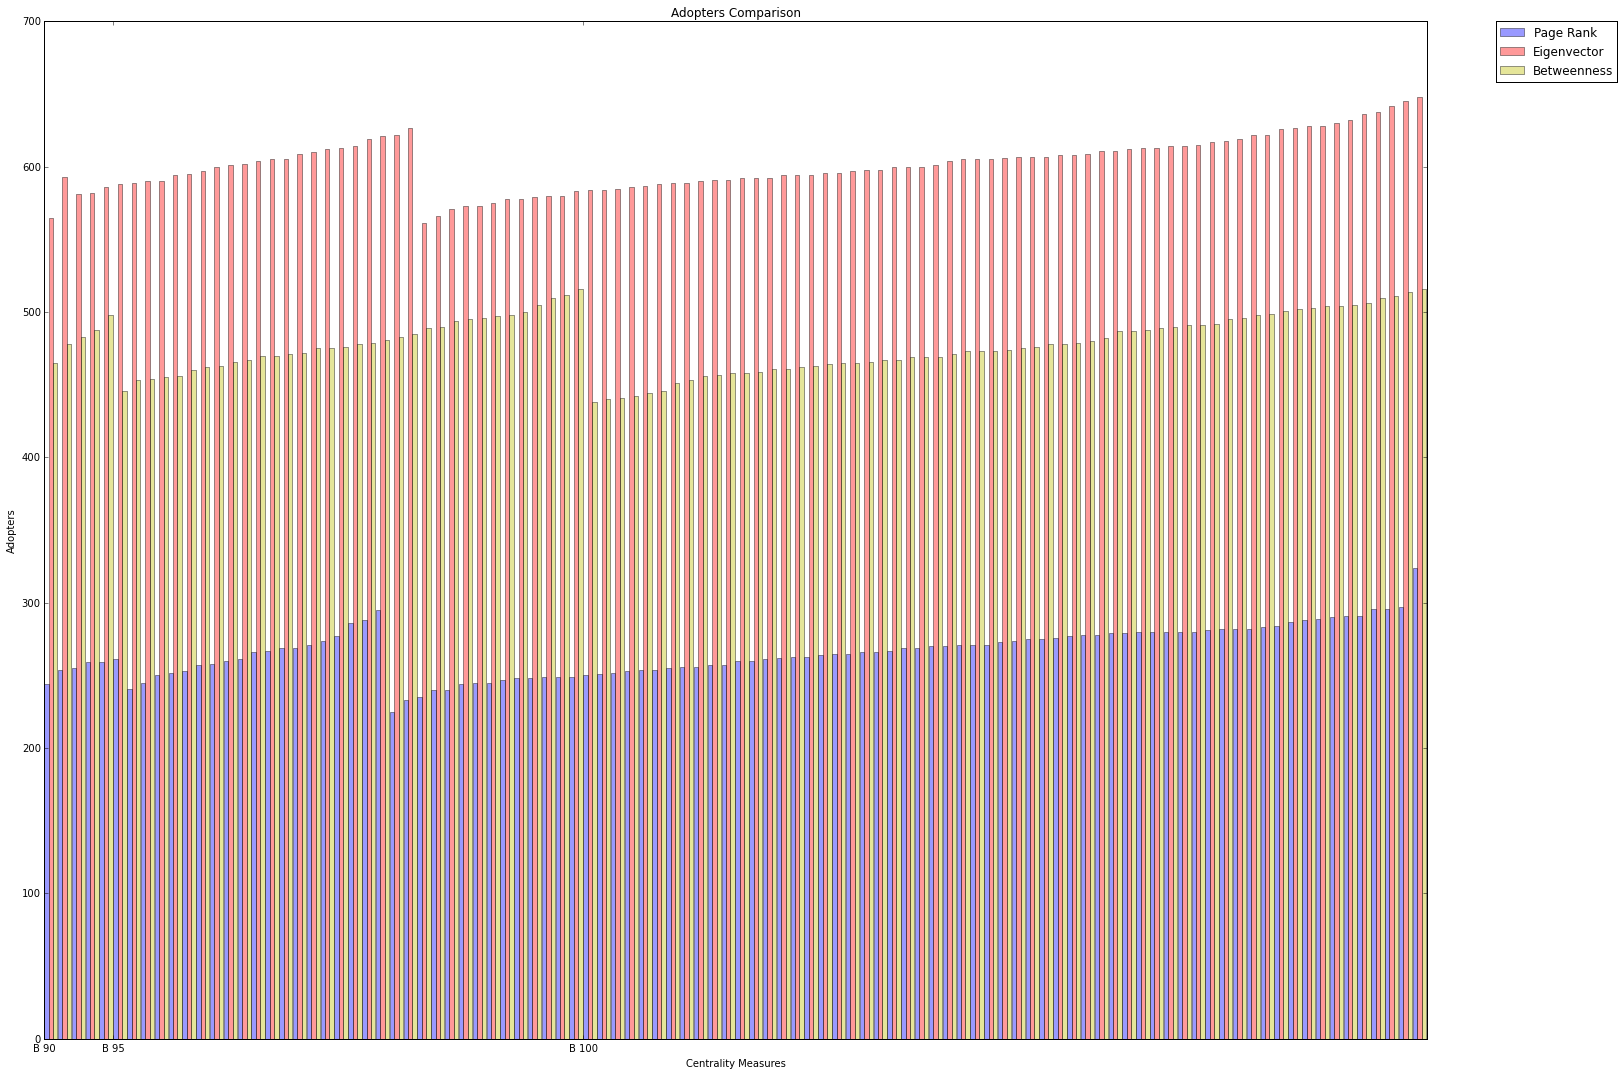

In [179]:
draw_bars(np.sort(pr.view('i8,i8'), order=['f0'], axis=0).view(np.int),
         np.sort(eigen.view('i8,i8'), order=['f0'], axis=0).view(np.int),
         np.sort(bet.view('i8,i8'), order=['f0'], axis=0).view(np.int))